<a href="https://colab.research.google.com/github/hrangkap/Data_Analyst_PI_01082301/blob/main/PCA_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.7463813007631839
Sum of Squared Errors (SSE): 1825.1026430379754


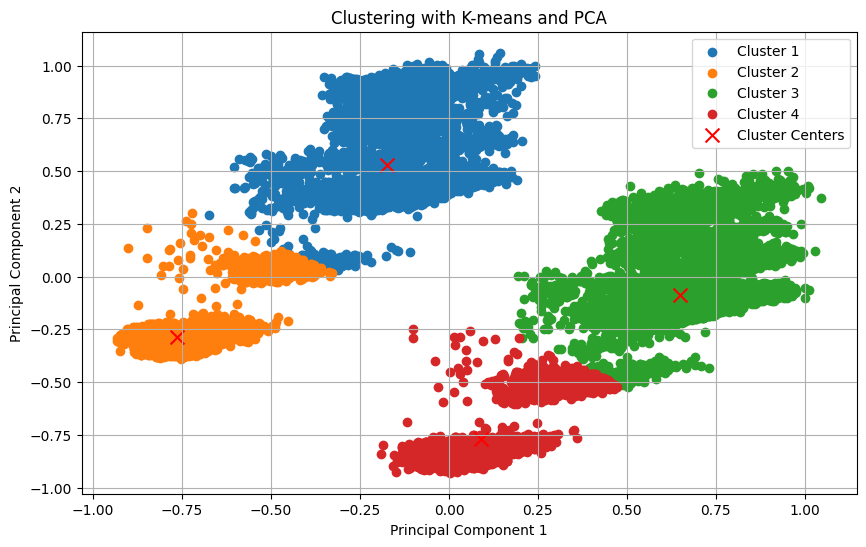

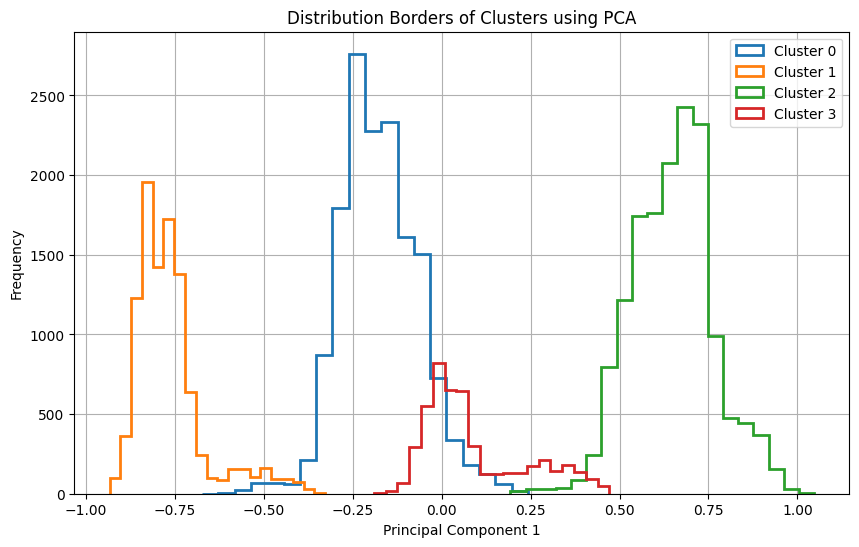

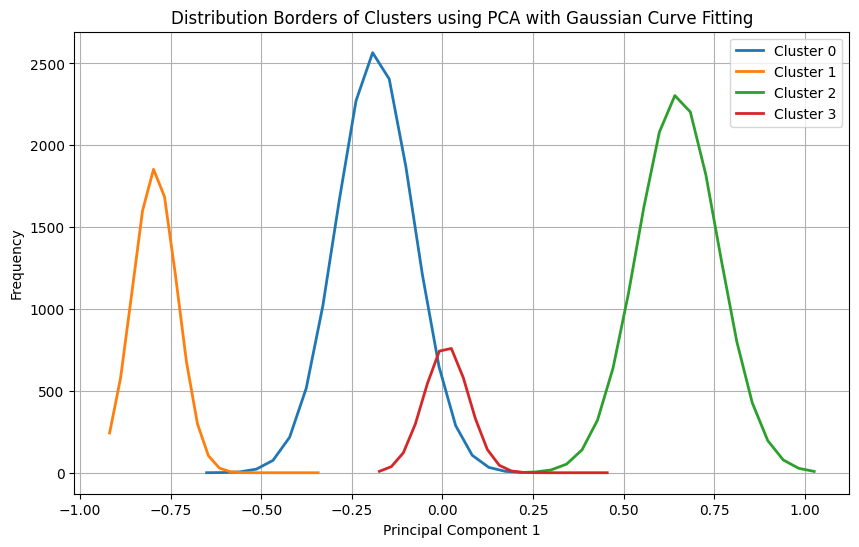

In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.optimize import curve_fit

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the CSV file on Google Drive
file_path = '/content/drive/MyDrive/Master Research Files/Datasets/train.csv'

# Load the dataset
dataset = pd.read_csv(file_path)

# Step 2: Identify the features that need to be encoded
# Assuming 'categorical_features' is a list containing the names of categorical columns in your dataset
categorical_features = ['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Step 3: Create a label encoder
label_encoder = LabelEncoder()

# Step 4: Encode the data
for feature in categorical_features:
    dataset[feature] = label_encoder.fit_transform(dataset[feature])

# Step 5: Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
dataset_normalized = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

# Step 6: Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)  # Change the number of components as needed
dataset_pca = pd.DataFrame(pca.fit_transform(dataset_normalized), columns=['PC1', 'PC2'])

# Step 7: Perform K-means clustering to get initial cluster centers
K = 4  # Replace 3 with the desired number of clusters
kmeans = KMeans(n_clusters=K)
kmeans.fit(dataset_pca)
cluster_centers = kmeans.cluster_centers_

# Step 8: Get the cluster assignments for each data point using K-means
clusters = kmeans.predict(dataset_pca)

# Step 9: Calculate the Silhouette Coefficient

# Clustering validity analysis
silhouette_avg = silhouette_score(dataset_pca, clusters)
sum_squared_errors = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Sum of Squared Errors (SSE): {sum_squared_errors}")

# Step 10: Define cluster labels based on hypothetical traits
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Step 11: Create a visualization of the clusters with labeled names
plt.figure(figsize=(10, 6))

# Plot each data point and color them based on their assigned cluster
for i in range(K):
    plt.scatter(dataset_pca[clusters == i]['PC1'], dataset_pca[clusters == i]['PC2'], label=cluster_labels[i])

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering with K-means and PCA')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Create a DataFrame with PCA results and assigned clusters
pca_clusters_df = pd.DataFrame(dataset_pca, columns=['PC1', 'PC2'])
pca_clusters_df['Cluster'] = clusters

# Step 10: Visualize the distribution borders of each cluster
plt.figure(figsize=(10, 6))

for cluster_id in range(K):
    cluster_data = pca_clusters_df[pca_clusters_df['Cluster'] == cluster_id]
    plt.hist(cluster_data['PC1'], bins=20, histtype='step', label=f'Cluster {cluster_id}', linewidth=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Frequency')
plt.title('Distribution Borders of Clusters using PCA')
plt.legend()
plt.grid(True)
plt.show()


# Step 10: Visualize the distribution borders of each cluster with Gaussian curve fitting
plt.figure(figsize=(10, 6))

for cluster_id in range(K):
    cluster_data = pca_clusters_df[pca_clusters_df['Cluster'] == cluster_id]['PC1']

    # Calculate histogram data
    hist, bins = np.histogram(cluster_data, bins=20)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Define the Gaussian function to fit
    def gaussian_func(x, a, mu, sigma):
        return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

    # Fit the Gaussian curve to the histogram data
    popt, _ = curve_fit(gaussian_func, bin_centers, hist)
    smooth_curve = gaussian_func(bin_centers, *popt)

    # Plot the smooth curve
    plt.plot(bin_centers, smooth_curve, label=f'Cluster {cluster_id}', linewidth=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Frequency')
plt.title('Distribution Borders of Clusters using PCA with Gaussian Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

# # Step 10: Visualize the distribution borders of each cluster with original frequency values
# plt.figure(figsize=(10, 6))

# for cluster_id in range(K):
#     cluster_data = pca_clusters_df[pca_clusters_df['Cluster'] == cluster_id]['PC1']

#     # Calculate histogram data
#     hist, bins = np.histogram(cluster_data, bins=20)
#     bin_centers = (bins[:-1] + bins[1:]) / 2

#     # Plot the histogram
#     plt.plot(bin_centers, hist, label=f'Cluster {cluster_id}', linewidth=2)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Frequency')
# plt.title('Distribution Borders of Clusters using PCA with Original Frequencies')
# plt.legend()
# plt.grid(True)
# plt.show()


# # Step 9: Create a DataFrame with PCA results and assigned clusters
# pca_clusters_df = pd.DataFrame(dataset_pca, columns=['PC1', 'PC2'])
# pca_clusters_df['Cluster'] = clusters

# # Step 10: Visualize the distribution borders of each cluster using KDE plots
# plt.figure(figsize=(10, 6))

# for cluster_id in range(K):
#     cluster_data = pca_clusters_df[pca_clusters_df['Cluster'] == cluster_id]
#     sns.kdeplot(cluster_data['PC1'], label=f'Cluster {cluster_id}', linewidth=2)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Density')
# plt.title('Rounded Distribution Borders of Clusters using PCA')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Identify the most representative data points within each cluster
# most_representative_indices = [np.argmin(np.linalg.norm(cluster_centers - cluster_center, axis=1)) for cluster_center in cluster_centers]

# # Get the corresponding data points from the original dataset
# most_representative_data = dataset.iloc[most_representative_indices]

# # Print the most representative data points
# print(most_representative_data)


# # Step 9: Create a DataFrame with PCA results and assigned clusters
# pca_clusters_df = pd.DataFrame(dataset_pca, columns=['PC1', 'PC2'])
# pca_clusters_df['Cluster'] = clusters

# # Step 10: Visualize smoothed curve distributions using KDE plots with scale adjustment
# plt.figure(figsize=(10, 6))

# # Adjust the scale using the bw_adjust parameter
# bw_adjust = 3 # Adjust this value to control the scale of the curve

# for cluster_id in range(K):
#     cluster_data = pca_clusters_df[pca_clusters_df['Cluster'] == cluster_id]
#     sns.kdeplot(cluster_data['PC1'], label=f'Cluster {cluster_id}', linewidth=2, bw_adjust=bw_adjust)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Density')
# plt.title('Smoothed Curve Distributions of Clusters using PCA')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Step 10: Calculate the frequencies for each cluster
# cluster_frequencies = []

# for cluster_id in range(K):
#     cluster_data = pca_clusters_df[pca_clusters_df['Cluster'] == cluster_id]
#     values, frequencies = np.unique(cluster_data['PC1'], return_counts=True)
#     cluster_frequencies.append((values, frequencies))

# # Step 11: Visualize smooth curves connecting the frequencies
# plt.figure(figsize=(10, 6))

# for cluster_id, (values, frequencies) in enumerate(cluster_frequencies):
#     plt.plot(values, frequencies, label=f'Cluster {cluster_id}', linewidth=2)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Frequency')
# plt.title('Smooth Curves of Clusters using PCA')
# plt.legend()
# plt.grid(True)
# plt.show()
